In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
import sparsetools as sp
from matplotlib.colors import LogNorm

In [16]:
obs = sp.profile('test_col200_obs.nc')
fit_lte = sp.profile('test_col200_fit_lte_noalma_2.nc')
mod_lte = sp.model('test_col200_mod_lte_noalma_2.nc')
fit_nlte = sp.profile('test_col200_fit_noalma_2.nc')
mod_nlte = sp.model('test_col200_mod_noalma_2.nc')
fit_tau = sp.profile('test_col200_fit_ltau_noalma_reg.nc')
mod_tau = sp.model('test_col200_mod_ltau_noalma_reg.nc')

profile::setsize: nx=1, ny=334, nw=95, ns=4, nt=1
profile::read: [profiles][wav][weights][pixel_weights]
profile::setsize: nx=1, ny=334, nw=95, ns=4, nt=1
profile::read: [profiles][wav][weights]
model::read: atmos type -> depth-stratified
model::read: nx=1, ny=334, ndep=61, nt=1
model::setSize: nx = 1, ny = 334, ndep = 61, nt = 1
profile::setsize: nx=1, ny=334, nw=95, ns=4, nt=1
profile::read: [profiles][wav][weights]
model::read: atmos type -> depth-stratified
model::read: nx=1, ny=334, ndep=61, nt=1
model::setSize: nx = 1, ny = 334, ndep = 61, nt = 1
profile::setsize: nx=1, ny=334, nw=95, ns=4, nt=1
profile::read: [profiles][wav][weights]
model::read: atmos type -> depth-stratified
model::read: nx=1, ny=334, ndep=61, nt=1
model::setSize: nx = 1, ny = 334, ndep = 61, nt = 1


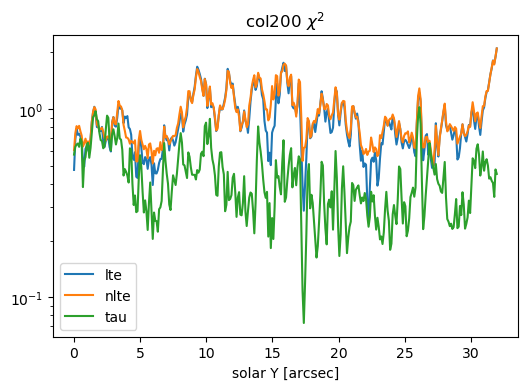

In [17]:
ind = np.where(obs.weights[:,0] < 1)[0]
chi_lte_raw = (fit_lte.dat-obs.dat)[0,:,0,:,0]**2/fit_lte.weights[:,0]
chi_lte = np.sum(chi_lte_raw,1)
chi_nlte_raw = (fit_nlte.dat-obs.dat)[0,:,0,:,0]**2/fit_nlte.weights[:,0]
chi_nlte = np.sum(chi_nlte_raw,1)
chi_tau_raw = (fit_tau.dat-obs.dat)[0,:,0,:,0]**2/fit_tau.weights[:,0]
chi_tau = np.sum(chi_tau_raw,1)
plt.plot(np.arange(334)*0.096,chi_lte,label="lte")
plt.plot(np.arange(334)*0.096,chi_nlte,label="nlte")
plt.plot(np.arange(334)*0.096,chi_tau,label="tau")
plt.yscale('log')
plt.xlabel('solar Y [arcsec]')
plt.title(r'col200 $\chi^2$')
plt.legend()
plt.savefig('col200_chi2_comparison_lte_tau.png')

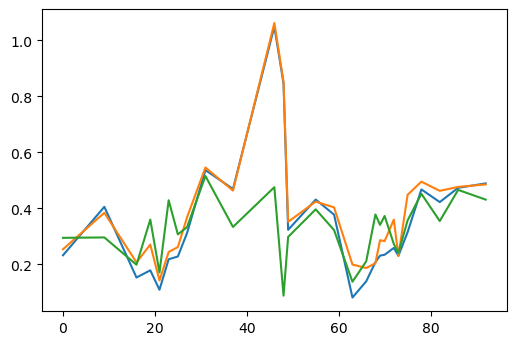

In [39]:
plt.plot(ind,np.max(chi_lte_raw,0)[ind]**0.5)
plt.plot(ind,np.max(chi_nlte_raw,0)[ind]**0.5)
plt.plot(ind,np.max(chi_tau_raw,0)[ind]**0.5)
#plt.yscale('log')

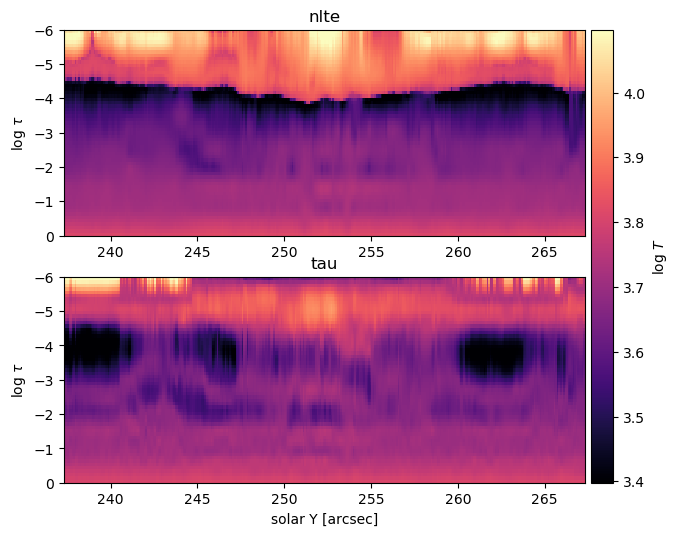

In [27]:
from scipy.interpolate import interp1d
z_lte = (mod_lte.z[0,:,0].T - mod_lte.z[0,:,0,58]).T*1e-5
z_nlte = (mod_nlte.z[0,:,0].T - mod_nlte.z[0,:,0,58]).T*1e-5
z_tau = (mod_tau.z[0,:,0].T - mod_tau.z[0,:,0,58]).T*1e-5
tlz = np.zeros((334,61))
tnz = np.zeros((334,61))
ttz = np.zeros((334,61))
for i in range(334):
    tlz[i] = interp1d(mod_lte.ltau[0,i,0],mod_lte.temp[0,i,0],kind=3,fill_value='extrapolate')(np.arange(61)*0.1-6)
    tnz[i] = interp1d(mod_nlte.ltau[0,i,0],mod_nlte.temp[0,i,0],kind=3,fill_value='extrapolate')(np.arange(61)*0.1-6)
    ttz[i] = interp1d(mod_tau.cmass[0,i,0],mod_tau.temp[0,i,0],kind=3,fill_value='extrapolate')(np.arange(61)*0.1-5.1)
fig,ax = plt.subplots(2,1,figsize=(8,6))
#tl = ax[0].imshow(np.log10(mod_lte.temp[0,:,0]),extent=[-5.1,0.9,237.3,267.3],origin='lower',\
#                    cmap='magma',aspect='auto',vmin=np.log10(2500),vmax=np.log10(12500))
#tn = ax[1].imshow(np.log10(mod_nlte.temp[0,:,0]),extent=[-5.1,0.9,237.3,267.3],origin='lower',\
#                    cmap='magma',aspect='auto',vmin=np.log10(2500),vmax=np.log10(12500))
#tt = ax[2].imshow(np.log10(ttz),extent=[-5.1,0.9,237.3,267.3],origin='lower',\
#                    cmap='magma',aspect='auto',vmin=np.log10(2500),vmax=np.log10(12500))
tl = ax[0].imshow(np.log10(tnz).T,extent=[237.3,267.3,0,-6],origin='upper',\
                    cmap='magma',aspect='auto',vmin=np.log10(2500),vmax=np.log10(12500))
tn = ax[1].imshow(np.log10(mod_tau.temp[0,:,0]).T,extent=[237.3,267.3,0,-6],origin='upper',\
                    cmap='magma',aspect='auto',vmin=np.log10(2500),vmax=np.log10(12500))
#tt = ax[2].imshow(np.log10(mod_tau.temp[0,:,0]),extent=[-6,0,237.3,267.3],origin='lower',\
#                    cmap='magma',aspect='auto',vmin=np.log10(2500),vmax=np.log10(12500))
plt.colorbar(tn,ax=ax,pad=0.01,label=r'$\log\ T$')
ax[0].set_ylabel(r'$\log\ \tau$')
ax[1].set_ylabel(r'$\log\ \tau$')
#ax[2].set_xlabel(r'$\log\ \tau$')
ax[1].set_xlabel('solar Y [arcsec]')
ax[0].set_title('nlte')
ax[1].set_title('tau')
#ax[2].set_title('tau')
plt.savefig('col200_models_comparison_nlte_tau.png')

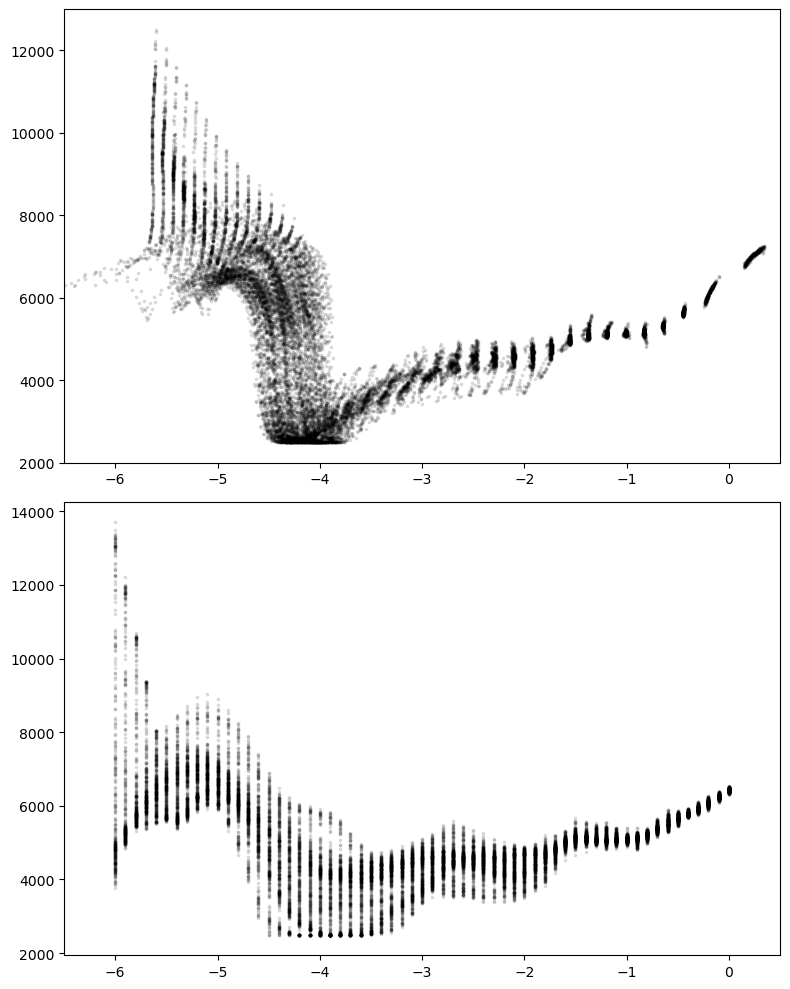

In [14]:
plt.figure(figsize=(8,10))
plt.subplot(211)
plt.scatter(mod_nlte.ltau.ravel(),mod_nlte.temp.ravel(),s=3,alpha=0.1,color='k')
plt.xlim(-6.5,0.5)
plt.subplot(212)
plt.scatter(mod_tau.ltau.ravel(),mod_tau.temp.ravel(),s=3,alpha=0.1,color='k')
plt.xlim(-6.5,0.5)
plt.tight_layout()

array([-4.9  , -1.55 , -0.317,  0.667])

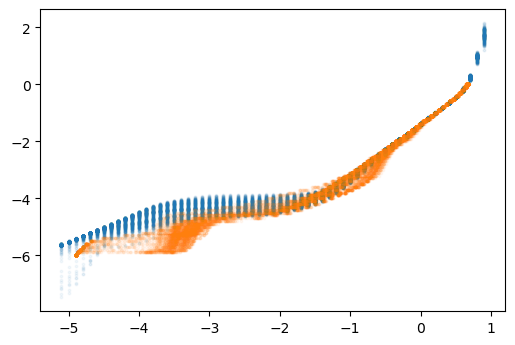

In [6]:
plt.scatter(mod_nlte.cmass[0,:,0].ravel(),mod_nlte.ltau[0,:,0].ravel(),s=3,alpha=0.05)
#plt.plot(mod_nlte.cmass[0,0,0][::3],np.mean(mod_nlte.ltau[0,:,0],0)[::3],'.')
plt.scatter(mod_tau.cmass[0,:,0].ravel(),mod_tau.ltau[0,:,0].ravel(),s=3,alpha=0.05)
#plt.plot(np.mean(mod_tau.cmass[0,:,0],0)[::3],mod_tau.ltau[0,0,0][::3],'.')
np.set_printoptions(precision=3)
#np.mean(mod_nlte.ltau[0,:,0],0)[::20]
np.mean(mod_tau.cmass[0,:,0],0)[::20]

[ 0  9 16 19 21 23 25 27 31 37 46 48 49 55 59 63 66 68 69 70 72 73 75 78
 82 86 92]


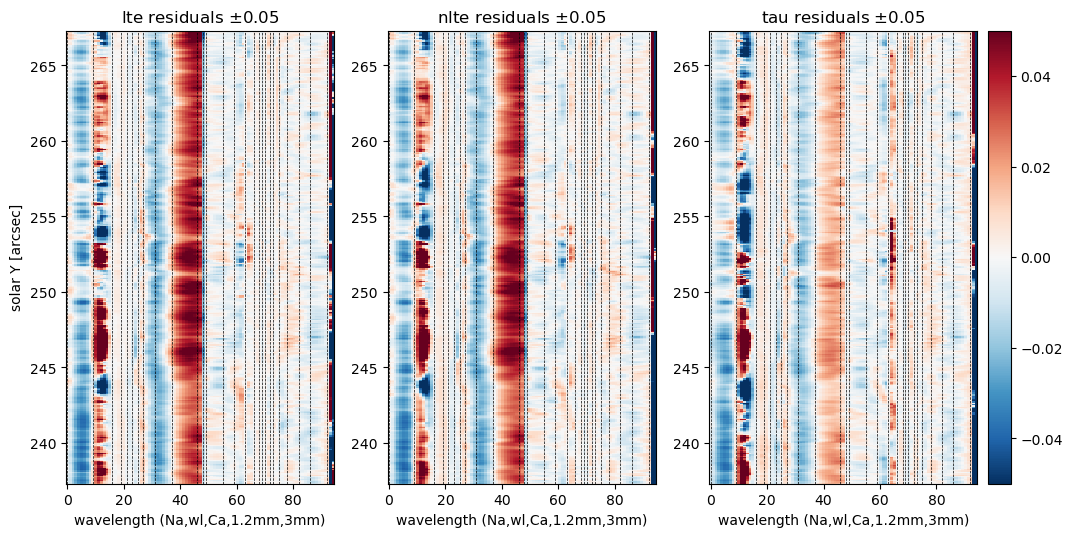

In [7]:
plt.figure(figsize=(14,6))
plt.subplot(131)
plt.imshow((fit_lte.dat-obs.dat)[0,:,0,:,0],extent=[-0.5,obs.nw-0.5,237.3,267.3],aspect='auto',\
           origin='lower',cmap='RdBu_r',vmin=-0.05,vmax=0.05)
for i in ind:
    plt.axvline(i,linestyle='--',color='k',linewidth=0.5)
plt.title(r'lte residuals $\pm 0.05$')
#plt.colorbar()
plt.xlabel('wavelength (Na,wl,Ca,1.2mm,3mm)')
plt.ylabel('solar Y [arcsec]')
plt.subplot(132)
plt.imshow((fit_nlte.dat-obs.dat)[0,:,0,:,0],extent=[-0.5,obs.nw-0.5,237.3,267.3],aspect='auto',\
           origin='lower',cmap='RdBu_r',vmin=-0.05,vmax=0.05)
for i in ind:
    plt.axvline(i,linestyle='--',color='k',linewidth=0.5)
plt.title(r'nlte residuals $\pm 0.05$')
#plt.colorbar()
plt.xlabel('wavelength (Na,wl,Ca,1.2mm,3mm)')
#plt.ylabel('solar Y [arcsec]')
plt.subplot(133)
plt.imshow((fit_tau.dat-obs.dat)[0,:,0,:,0],extent=[-0.5,obs.nw-0.5,237.3,267.3],aspect='auto',\
           origin='lower',cmap='RdBu_r',vmin=-0.05,vmax=0.05)
for i in ind:
    plt.axvline(i,linestyle='--',color='k',linewidth=0.5)
plt.title(r'tau residuals $\pm 0.05$')
plt.colorbar(pad=0.01,ax=plt.gcf().axes)
plt.xlabel('wavelength (Na,wl,Ca,1.2mm,3mm)')
#plt.ylabel('solar Y [arcsec]')
#plt.tight_layout()
plt.savefig('lte_tau_col200_residuals.png')
print(ind)

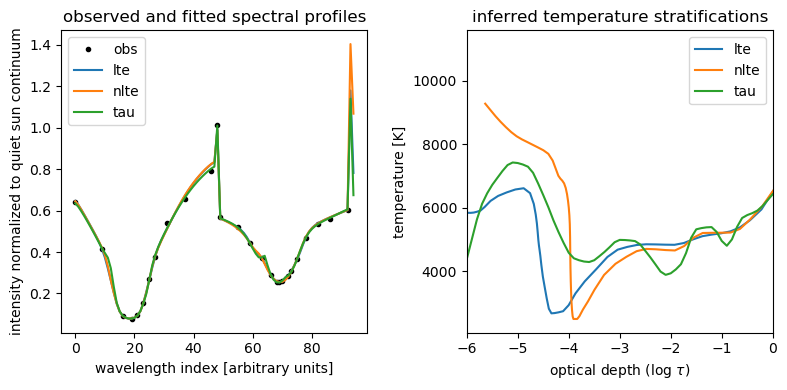

In [44]:
y = 150
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.plot(ind,obs.dat[0,y,0,ind,0],'.k',label='obs')
plt.plot(fit_lte.dat[0,y,0,:,0],label='lte')
plt.plot(fit_nlte.dat[0,y,0,:,0],label='nlte')
plt.plot(fit_tau.dat[0,y,0,:,0],label='tau')
plt.legend()
plt.xlabel('wavelength index [arbitrary units]')
plt.ylabel('intensity normalized to quiet sun continuum')
plt.title('observed and fitted spectral profiles')
plt.subplot(122)
plt.plot(mod_lte.ltau[0,y,0],mod_lte.temp[0,y,0],label='lte')
plt.plot(mod_nlte.ltau[0,y,0],mod_nlte.temp[0,y,0],label='nlte')
plt.plot(mod_tau.ltau[0,y,0],mod_tau.temp[0,y,0],label='tau')
plt.legend()
plt.xlabel(r'optical depth ($\log\ \tau$)')
plt.ylabel('temperature [K]')
plt.xlim(-6,0)
plt.title('inferred temperature stratifications')
plt.tight_layout()
plt.savefig('inversion_example_plot.png')

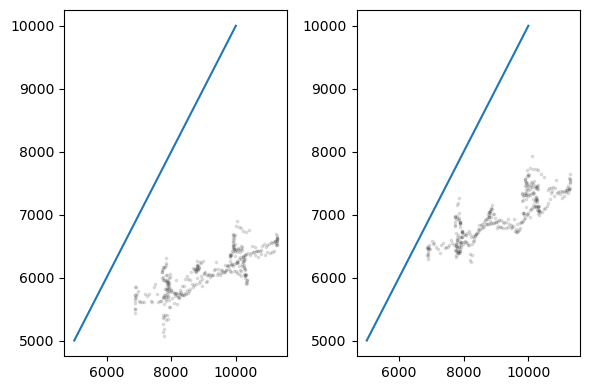

In [47]:
plt.subplot(121)
plt.scatter(obs.dat[0,:,0,-1,0].ravel()*7300,mod_lte.temp[0,:,0,13],s=3,alpha=0.1,color='k')
plt.plot([5000,10000],[5000,10000])
plt.subplot(122)
plt.scatter(obs.dat[0,:,0,-1,0].ravel()*7300,mod_nlte.temp[0,:,0,13],s=3,alpha=0.1,color='k')
plt.plot([5000,10000],[5000,10000])
plt.tight_layout()

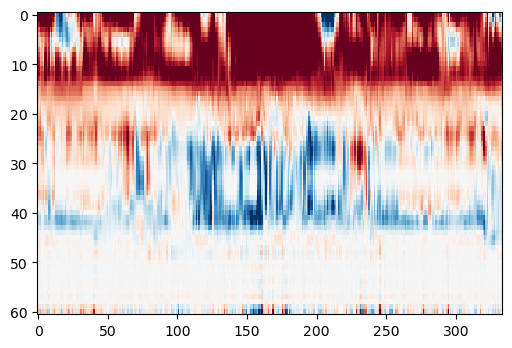

In [49]:
plt.imshow((mod_nlte.temp-mod_lte.temp)[0,:,0].T,cmap='RdBu_r',vmin=-1000,vmax=1000,aspect='auto')